### 시장 중심도: 종목 조회 건 수, 관심 종목 등록 건 수, 신규 매수 계좌 수, 전량 매도 계좌 수, 거래 대금

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib

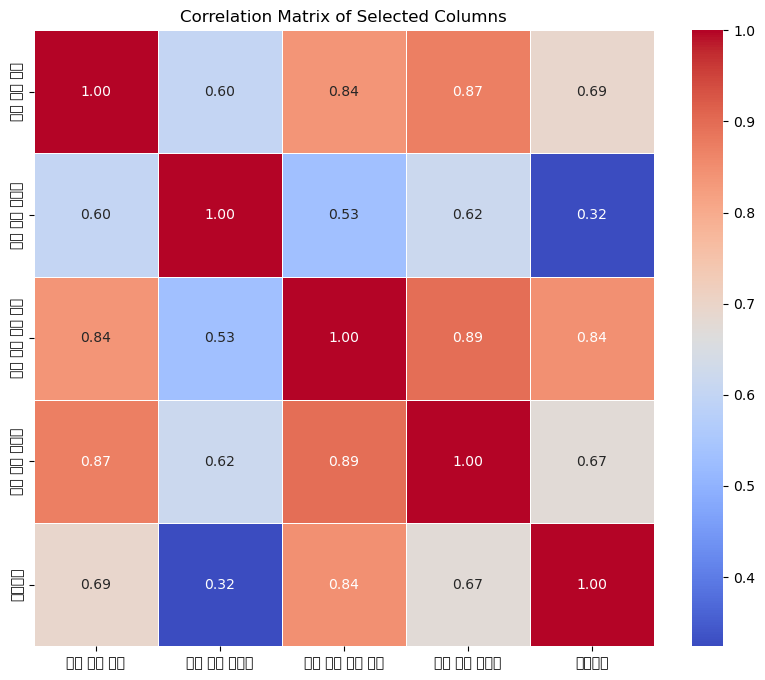

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = r'C:\Users\asdjj\OneDrive\바탕 화면\코딩 공부\NH 데이콘\데이터\재구성 데이터\시장_관심도_중심(interest).csv'
data = pd.read_csv(file_path)

# 'tck_iem_cd'를 기준으로 그룹화하여 각 수치형 컬럼의 합계를 계산
grouped_data = data.groupby('tck_iem_cd').sum(numeric_only=True)

# 상관관계 계산 (피어슨 상관계수)
correlation_matrix = grouped_data[['종목 조회 건수', '신규 매수 계좌수', '관심 종목 등록 건수', '전량 매도 계좌수', '거래대금']].corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()


In [69]:
correlation_matrix

,종목 조회 건수,신규 매수 계좌수,관심 종목 등록 건수,전량 매도 계좌수,거래대금
종목 조회 건수,1.000000,0.601613,0.837954,0.870708,0.691601
신규 매수 계좌수,0.601613,1.000000,0.530204,0.619187,0.324038
관심 종목 등록 건수,0.837954,0.530204,1.000000,0.894971,0.844410
전량 매도 계좌수,0.870708,0.619187,0.894971,1.000000,0.673939
거래대금,0.691601,0.324038,0.844410,0.673939,1.000000


In [70]:
# p-value 계산을 위한 컬럼들 선택
columns_of_interest = ['종목 조회 건수', '신규 매수 계좌수', '관심 종목 등록 건수', '전량 매도 계좌수', '거래대금']

# p-value 계산 후 결과 저장
correlation_results = []
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 != col2:
            corr, p_value = pearsonr(grouped_data[col1], grouped_data[col2])
            correlation_results.append([col1, col2, corr, p_value])

# 결과를 DataFrame으로 변환
correlation_df = pd.DataFrame(correlation_results, columns=['변수1', '변수2', '상관계수', 'p-value'])
correlation_df

,변수1,변수2,상관계수,p-value
0,종목 조회 건수,신규 매수 계좌수,0.601613,1.476213e-126
1,종목 조회 건수,관심 종목 등록 건수,0.837954,0.000000e+00
2,종목 조회 건수,전량 매도 계좌수,0.870708,0.000000e+00
3,종목 조회 건수,거래대금,0.691601,2.281843e-182
4,신규 매수 계좌수,종목 조회 건수,0.601613,1.476213e-126
5,신규 매수 계좌수,관심 종목 등록 건수,0.530204,1.751908e-93
6,신규 매수 계좌수,전량 매도 계좌수,0.619187,4.869371e-136
7,신규 매수 계좌수,거래대금,0.324038,1.326366e-32
8,관심 종목 등록 건수,종목 조회 건수,0.837954,0.000000e+00
9,관심 종목 등록 건수,신규 매수 계좌수,0.530204,1.751908e-93


### 티커 코드를 중심으로 회사별 모든 데이터의 합을 한 후 모든 컬럼의 상관계수 출력 및 확인(히트맵 이용, 0.7이상 상관계수만 뽑아내기) 

In [71]:
# CSV 파일(NH_CONTEST_NHDATA_STK_DD_IFO) 불러오기
STK_DD_IFO_file_path = 'C:/Users/asdjj/OneDrive/바탕 화면/코딩 공부/NH 데이콘/데이터/NH_CONTEST_NHDATA_STK_DD_IFO.csv'
df = pd.read_csv(STK_DD_IFO_file_path)

# 'tck_iem_cd'를 기준으로 그룹화하고, 숫자형 컬럼의 합계를 계산
summary = df.groupby('tck_iem_cd').sum(numeric_only=True).reset_index()


summary.head()


,tck_iem_cd,bse_dt,tot_hld_act_cnt,tot_hld_qty,tco_avg_hld_qty,tco_avg_hld_wht_rt,tco_avg_eal_pls,tco_avg_phs_uit_pr,tco_avg_pft_rt,tco_avg_hld_te_dd_cnt,...,dist_hnk_pct50_nmv,dist_hnk_pct70_nmv,dist_hnk_pct90_nmv,bse_end_pr,lss_ivo_rt,pft_ivo_rt,ifw_act_cnt,ofw_act_cnt,vw_tgt_cnt,rgs_tgt_cnt
0,AA,1295404933,15505,470870,1941.74,879.79,1868960.34,3204378.08,121.93,92.0,...,3263793.876,3550560.708,4287044.841,3258341.695,29.4103,34.5897,135,177,18477,534
1,AAL,1295404933,173468,18833569,6948.76,944.27,-28918513.30,1338212.80,-1393.59,92.0,...,1338035.075,1494294.633,1638651.875,954049.235,61.3478,2.6493,513,472,41381,434
2,AAN,1295404933,753,19606,1656.21,861.64,-44765242.73,1447702.74,-4336.32,92.0,...,1246632.200,1321763.880,2105164.550,838188.274,50.9403,13.0597,7,9,1220,73
3,AAOI,1295404933,1230,184105,9421.60,1282.53,-22104231.59,968715.15,-1203.24,92.0,...,1029786.648,1165565.815,1248466.157,814341.484,45.9412,18.0588,11,11,1463,89
4,AAPB,1295404933,7600,484193,4008.61,705.22,22944240.84,1989755.72,1222.63,92.0,...,1979443.472,2268865.519,2444381.204,2330354.315,14.1601,49.8399,204,232,7138,273


In [74]:
import os

# CSV 파일들이 저장된 디렉토리 경로 설정
folder_path = r'C:\Users\asdjj\OneDrive\바탕 화면\코딩 공부\NH 데이콘\데이터'

# 분석할 파일 목록('tck_iem_cd'이 존재하는 파일 선정)
csv_files = [
    'NH_CONTEST_NHDATA_STK_DD_IFO.csv', 
    'NH_CONTEST_NHDATA_IFW_OFW_IFO.csv',
    'NH_CONTEST_STK_DT_QUT.csv',
    'NH_CONTEST_ETF_SOR_IFO.csv',
    'NH_CONTEST_NHDATA_CUS_TP_IFO.csv',
    'NH_CONTEST_NW_FC_STK_IEM_IFO.csv'
]

# 데이터를 저장할 리스트 초기화
df_list = []

# 각 CSV 파일에 대해 처리
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    # CSV 파일 불러오기 (latin1 인코딩 사용)
    try:
        df = pd.read_csv(file_path, encoding='latin1')  # encoding='latin1'로 변경
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # 다른 인코딩 방식도 시도
        
    df.columns = df.columns.str.lower()  # 모든 컬럼명을 소문자로 변환
    
    # 'tck_iem_cd'가 실제로 있는지 확인
    if 'tck_iem_cd' in df.columns:
        # 필요한 컬럼 선택 (필요한 컬럼이 'tck_iem_cd'와 숫자형 데이터라고 가정)
        required_columns = ['tck_iem_cd', 'ltg_tot_stk_qty', 'mkt_pr_tot_amt', 'iem_ong_pr', 'iem_hi_pr', 
                            'iem_low_pr', 'iem_end_pr', 'bf_dd_cmp_ind_pr', 'bf_dd_cmp_ind_rt', 'acl_trd_qty', 
                            'trd_cst', 'sll_cns_sum_qty', 'byn_cns_sum_qty', 'sby_bse_xcg_rt', 'tot_hld_act_cnt', 
                            'tot_hld_qty', 'tco_avg_hld_qty', 'tco_avg_hld_wht_rt', 'tco_avg_eal_pls', 
                            'tco_avg_phs_uit_pr', 'tco_avg_pft_rt', 'tco_avg_hld_te_dd_cnt', 'dist_hnk_pct10_nmv', 
                            'dist_hnk_pct30_nmv', 'dist_hnk_pct50_nmv', 'dist_hnk_pct70_nmv', 'dist_hnk_pct90_nmv', 
                            'bse_end_pr', 'lss_ivo_rt', 'pft_ivo_rt', 'ifw_act_cnt', 'ofw_act_cnt', 'vw_tgt_cnt', 
                            'rgs_tgt_cnt', 'ifw_ofw_amt_wht_rt', 'ifw_ofw_rnk', 'cus_cgr_act_cnt_rt', 'cus_cgr_ivs_rt', 
                            'ddn_amt', 'mm1_tot_pft_rt', 'mm3_tot_pft_rt', 'yr1_tot_pft_rt', 'etf_sor', 'etf_z_sor', 
                            'z_sor_rnk', 'acl_pft_rt_z_sor', 'ifo_rt_z_sor', 'shpr_z_sor', 'crr_z_sor', 'trk_err_z_sor', 
                            'mxdd_z_sor', 'vty_z_sor']
        
        # 데이터프레임의 컬럼 중 실제로 존재하는 컬럼만 선택
        available_columns = [col for col in required_columns if col in df.columns]
        df = df[available_columns]  # 필요한 컬럼만 선택
        
        # 'tck_iem_cd' 기준으로 그룹화하고, 합계 계산
        grouped_df = df.groupby('tck_iem_cd').sum(numeric_only=True).reset_index()
        
        # 결과를 리스트에 저장
        df_list.append(grouped_df)
    else:
        print(f"'tck_iem_cd'가 {file} 파일에 존재하지 않음")

# 모든 데이터프레임을 하나로 병합 (필요 시)
final_df = pd.concat(df_list, ignore_index=True)

# 결과 확인
print(final_df.head())

'tck_iem_cd'가 NH_CONTEST_ETF_SOR_IFO.csv 파일에 존재하지 않음
     tck_iem_cd  tot_hld_act_cnt  tot_hld_qty  tco_avg_hld_qty  \
0  AA                    15505.0     470870.0          1941.74   
1  AAL                  173468.0   18833569.0          6948.76   
2  AAN                     753.0      19606.0          1656.21   
3  AAOI                   1230.0     184105.0          9421.60   
4  AAPB                   7600.0     484193.0          4008.61   

   tco_avg_hld_wht_rt  tco_avg_eal_pls  tco_avg_phs_uit_pr  tco_avg_pft_rt  \
0              879.79       1868960.34          3204378.08          121.93   
1              944.27     -28918513.30          1338212.80        -1393.59   
2              861.64     -44765242.73          1447702.74        -4336.32   
3             1282.53     -22104231.59           968715.15        -1203.24   
4              705.22      22944240.84          1989755.72         1222.63   

   tco_avg_hld_te_dd_cnt  dist_hnk_pct10_nmv  ...  bf_dd_cmp_ind_rt  \
0         

C:\Users\asdjj\AppData\Local\Temp\ipykernel_22932\3824570590.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_correlation_matrix = final_df.corr()


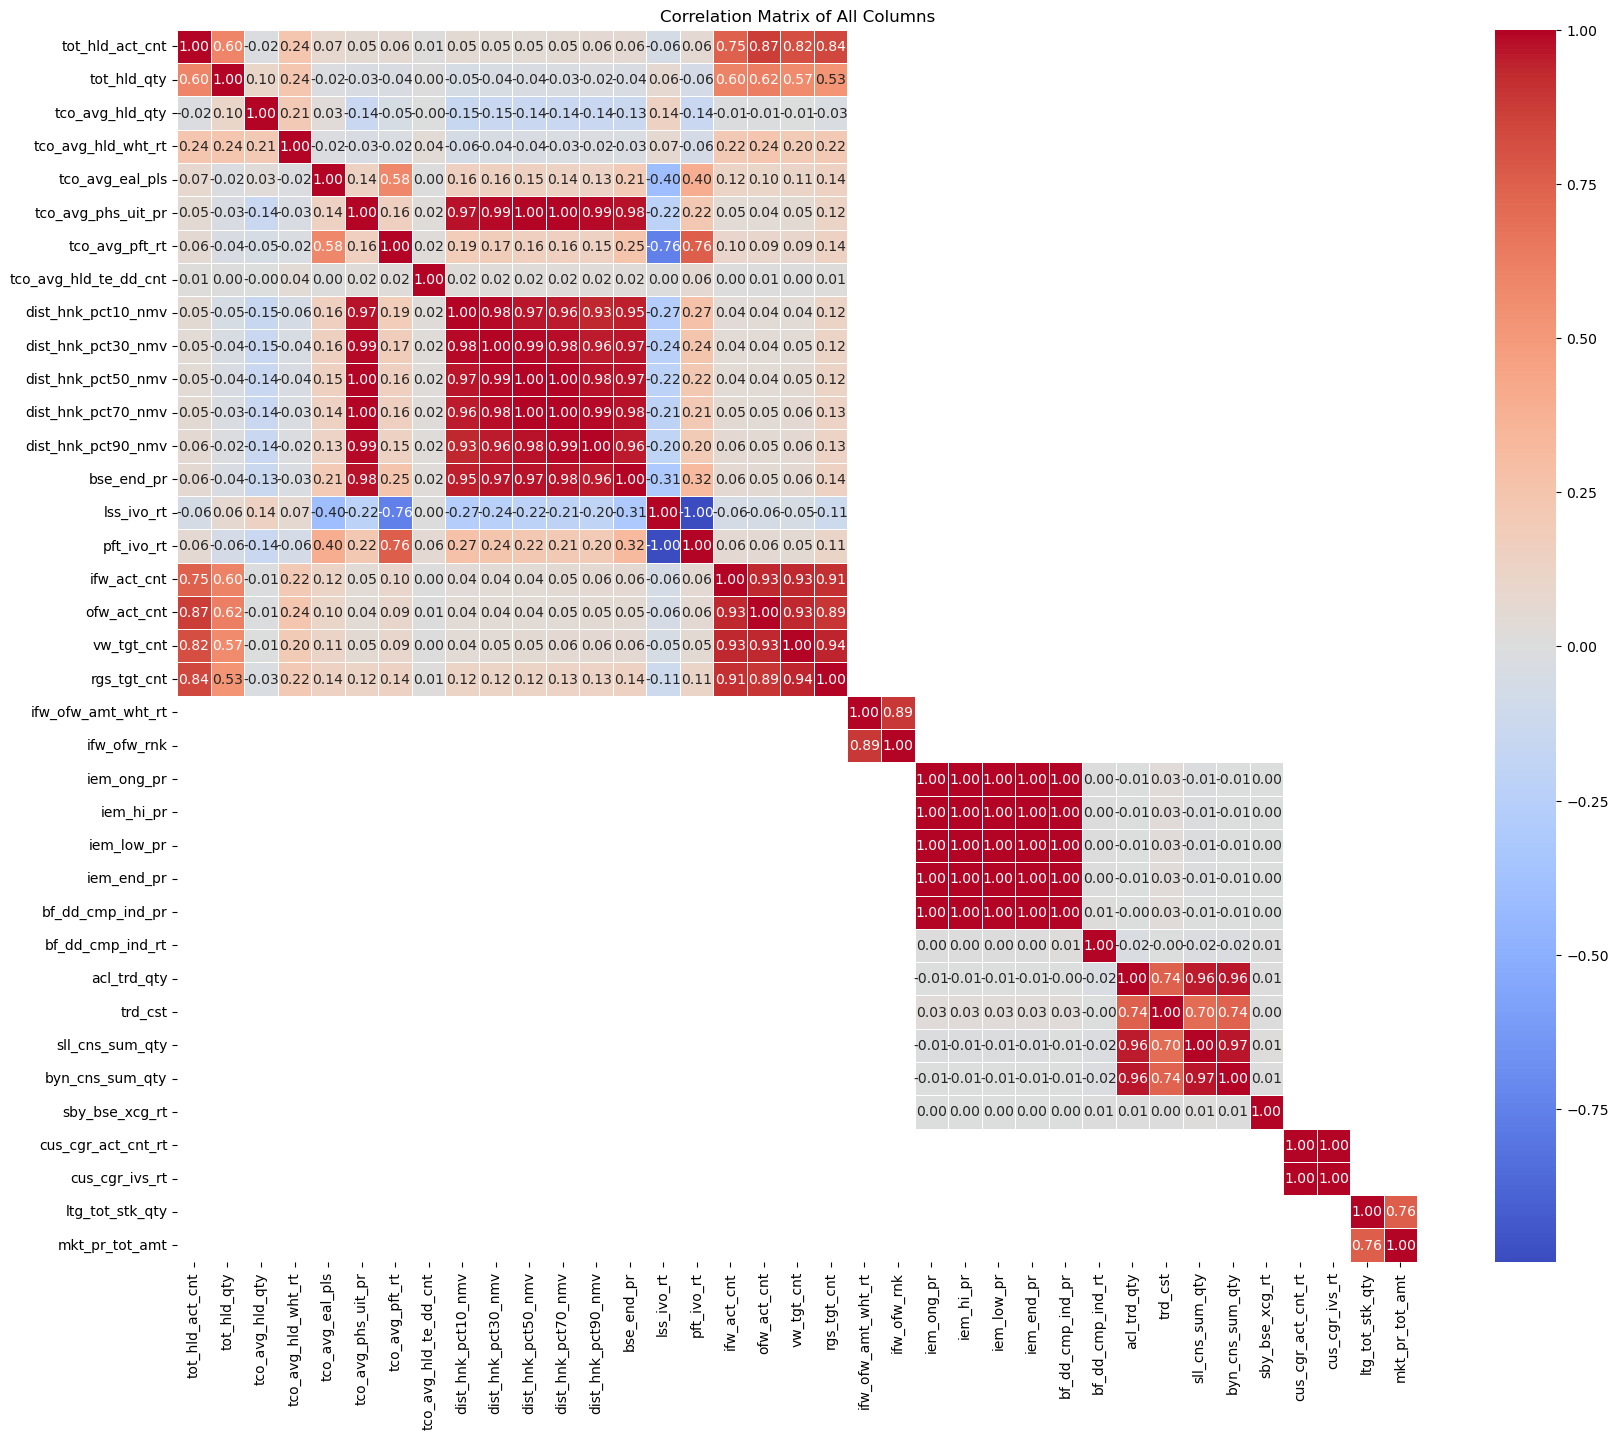

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산: 숫자형 데이터만을 기준으로 상관관계 계산
all_correlation_matrix = final_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(all_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Columns')
plt.show()

In [76]:
all_correlation_matrix

,tot_hld_act_cnt,tot_hld_qty,tco_avg_hld_qty,tco_avg_hld_wht_rt,tco_avg_eal_pls,tco_avg_phs_uit_pr,tco_avg_pft_rt,tco_avg_hld_te_dd_cnt,dist_hnk_pct10_nmv,dist_hnk_pct30_nmv,...,bf_dd_cmp_ind_rt,acl_trd_qty,trd_cst,sll_cns_sum_qty,byn_cns_sum_qty,sby_bse_xcg_rt,cus_cgr_act_cnt_rt,cus_cgr_ivs_rt,ltg_tot_stk_qty,mkt_pr_tot_amt
tot_hld_act_cnt,1.000000,0.601767,-0.022338,0.237052,0.074935,0.049587,0.063393,0.008979,0.050395,0.045973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tot_hld_qty,0.601767,1.000000,0.103640,0.242528,-0.016877,-0.033362,-0.036597,0.003930,-0.049185,-0.044851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tco_avg_hld_qty,-0.022338,0.103640,1.000000,0.214316,0.027562,-0.143818,-0.048149,-0.002125,-0.153491,-0.146456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tco_avg_hld_wht_rt,0.237052,0.242528,0.214316,1.000000,-0.017200,-0.033958,-0.024210,0.042486,-0.056486,-0.038664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tco_avg_eal_pls,0.074935,-0.016877,0.027562,-0.017200,1.000000,0.144503,0.583356,0.003709,0.158161,0.155754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tco_avg_phs_uit_pr,0.049587,-0.033362,-0.143818,-0.033958,0.144503,1.000000,0.161986,0.023183,0.970574,0.988490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tco_avg_pft_rt,0.063393,-0.036597,-0.048149,-0.024210,0.583356,0.161986,1.000000,0.016711,0.186811,0.174505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tco_avg_hld_te_dd_cnt,0.008979,0.003930,-0.002125,0.042486,0.003709,0.023183,0.016711,1.000000,0.023093,0.023328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dist_hnk_pct10_nmv,0.050395,-0.049185,-0.153491,-0.056486,0.158161,0.970574,0.186811,0.023093,1.000000,0.984410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dist_hnk_pct30_nmv,0.045973,-0.044851,-0.146456,-0.038664,0.155754,0.988490,0.174505,0.023328,0.984410,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
import pandas as pd
import numpy as np

# 데이터 로드: 이전 단계에서 처리된 데이터프레임(final_df)이 있다고 가정
# (final_df에 이미 데이터를 그룹화하고 필요한 컬럼들이 선택된 상태)

# 상관계수 계산: 숫자형 데이터만을 기준으로 상관관계 계산
all_correlation_matrix = final_df.corr()

# 상관계수 절대값이 0.7 이상인 값들만 필터링
high_corr_pairs = (all_correlation_matrix
                   .where(np.triu(np.ones(all_correlation_matrix.shape), k=1).astype(bool))  # 대각선을 제외한 상삼각 행렬만 가져옴
                   .stack()  # 상관관계 쌍을 추출
                   .reset_index()  # DataFrame으로 변환
                   .rename(columns={0: 'correlation'})  # 상관관계 열 이름 설정
                   .query('abs(correlation) >= 0.70'))  # 상관계수 절대값이 0.70 이상인 것만 필터링

# 결과 확인
high_corr_pairs

C:\Users\asdjj\AppData\Local\Temp\ipykernel_22932\997892961.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_correlation_matrix = final_df.corr()


,level_0,level_1,correlation
15,tot_hld_act_cnt,ifw_act_cnt,0.746987
16,tot_hld_act_cnt,ofw_act_cnt,0.868691
17,tot_hld_act_cnt,vw_tgt_cnt,0.817378
18,tot_hld_act_cnt,rgs_tgt_cnt,0.836839
87,tco_avg_phs_uit_pr,dist_hnk_pct10_nmv,0.970574
88,tco_avg_phs_uit_pr,dist_hnk_pct30_nmv,0.988490
89,tco_avg_phs_uit_pr,dist_hnk_pct50_nmv,0.996011
90,tco_avg_phs_uit_pr,dist_hnk_pct70_nmv,0.996392
91,tco_avg_phs_uit_pr,dist_hnk_pct90_nmv,0.988155
92,tco_avg_phs_uit_pr,bse_end_pr,0.975225


In [78]:
# 영문 컬럼명을 한국어로 변환하는 함수
def translate_column_names(df, column_name_mapping):
    # 컬럼명 정규화 (소문자로 변환하고, 공백 제거)
    df['level_0'] = df['level_0'].str.strip().str.lower().replace(column_name_mapping)
    df['level_1'] = df['level_1'].str.strip().str.lower().replace(column_name_mapping)
    return df

# 영문-한국어 컬럼명을 매핑하는 사전
column_name_mapping = {
    'tot_hld_act_cnt': '총보유계좌수',
    'ifw_act_cnt': '신규매수계좌수',
    'ofw_act_cnt': '전량매도계좌수',
    'vw_tgt_cnt': '종목조회건수',
    'rgs_tgt_cnt': '관심종목등록건수',
    'tco_avg_phs_uit_pr': '당사평균매입단가',
    'dist_hnk_pct10_nmv': '분포상위10퍼센트수치',
    'dist_hnk_pct30_nmv': '분포상위30퍼센트수치',
    'dist_hnk_pct50_nmv': '분포상위50퍼센트수치',
    'dist_hnk_pct70_nmv': '분포상위70퍼센트수치',
    'dist_hnk_pct90_nmv': '분포상위90퍼센트수치',
    'bse_end_pr': '기준종가',
    'tco_avg_pft_rt': '당사평균수익율',
    'lss_ivo_rt': '손실투자자비율',
    'pft_ivo_rt': '수익투자자비율',
    'trd_cst': '거래대금',
    'sll_cns_sum_qty': '매도체결합계수량',
    'byn_cns_sum_qty': '매수체결합계수량',
    'cus_cgr_act_cnt_rt': '고객구성계좌수비율',
    'cus_cgr_ivs_rt': '고객구성투자비율',
    'ltg_tot_stk_qty': '상장주식총수량',
    'mkt_pr_tot_amt': '시가총액',
    'iem_ong_pr': '종목시가',
    'iem_hi_pr': '종목고가',
    'iem_low_pr': '종목저가',
    'iem_end_pr': '종목종가',
    'bf_dd_cmp_ind_pr': '전일대비증감가격',
    'acl_trd_qty': '누적거래수량',
    'ifw_ofw_amt_wht_rt': '유입유출금액비중',
    'ifw_ofw_rnk': '유입유출랭크'
}

# 상관관계 테이블에 한국어 컬럼명 적용
high_corr_pairs_translated = translate_column_names(high_corr_pairs, column_name_mapping)

# 결과 확인
high_corr_pairs_translated


,level_0,level_1,correlation
15,총보유계좌수,신규매수계좌수,0.746987
16,총보유계좌수,전량매도계좌수,0.868691
17,총보유계좌수,종목조회건수,0.817378
18,총보유계좌수,관심종목등록건수,0.836839
87,당사평균매입단가,분포상위10퍼센트수치,0.970574
88,당사평균매입단가,분포상위30퍼센트수치,0.988490
89,당사평균매입단가,분포상위50퍼센트수치,0.996011
90,당사평균매입단가,분포상위70퍼센트수치,0.996392
91,당사평균매입단가,분포상위90퍼센트수치,0.988155
92,당사평균매입단가,기준종가,0.975225
